# Modelo tasa de abandono de clientes de una entidad bancaria

## Abstracto de motivación

La tasa de rotación y de abandono, son aspectos de gran relevancia dentro del ciclo de vida del cliente. En el contexto económico actual, donde el efecto pandemía generó grandes cambios en la forma en la que los clientes compran y solicitan servicios, al igual que la gran facilidad de acceso a la información y los diferentes aspectos demográficos que fluctuan con las altas y bajas del mercado. Se ha vuelta más que una estrategia una necesidad los niveles de prevención y fidelización para todas las empresas, en este caso particular, percibimos que las entidades bancarias no solo deben luchar con la transformación digital, ciberseguridad y productos de vanguardia, sino que deben hacer un acercamiento a aquellas variables que podrían modificar el estatus de un cliente fidelizado a un cliente que se vea obligado a retirarse de los servicios de la entidad. Con este modelo, se busca crear una forma preventiva de accionar soluciones a posibles clientes que abandonen la entidad y poder dar una vuelta al ciclo de vida del cliente y lograrlos fidelizar sin necesidad de maltratar su confianza con el banco.

## Audiencia

Este caso está orientado para quen los resultados puedan usarse para que las respectivas partes interesadas, como los son Directivos del banco, gerentes de producto o analístas de retención, puedan tomar decisiones y prevenir la salida de clientes que ya tienen un ciclo avanzado en su ciclo de servicio.

## Contexto comercial

La base de datos que se está contemplando, corresponde a la de una entidad bancaria de Estados Unidos. El sector terciario, donde se ubice el sector financiero, tiene un 79,6% de participación en el PIB de EEUU. Bajo esta premisa, se sobre entiende la gran importancia que tiene este sector en el corazón de la economía estadounidense.

## Objetivo e Hipótesis

El objetivo principal que se plantea en el marco del desarrollo de este caso de estudio es:

### Determinar y validar la capacidad de predicción de la variable "abandono" en un modelo de Machine Learning supervisado con base a características demográficas de un grupo de clientes.

A partir del planteamiento del objetivo, se establecen las siguientes preguntas de hipótesis de acuerdo con la base de datos que será utilizada para entrenar el modelo.

1. ¿Es posible predecir la salida de clientes de una entidad bancaria, basada en una base estructurada de clientes que se han retirado de la entidad?
2. ¿El balance de cuenta(balance), es una variable dependiente que se relacione con la salida de clientes(churn)?
3. ¿El salario estimado(estimated_salary), es una variable dependiente que se relacione con la salida de clientes(churn)?
4. ¿Las variables edad, rango de ingreso y tarjeta de crédito, tiene influecnia en la salida del cliente?
5. ¿Es posible categorizar los clientes utilizando sus ubicaciones y que esto sea un factor clave en el modelo?


## **Storytelling**

Explicar la salida de clientes frecuentes e intentar conseguir retenerlos antes que tomen esta decisión, se ha convertido en un reto para las empresas de hoy, en este caso en particular, para las entidades bancarias.

Una de las respuestas que nos brinda mayor cantidad de detalle y precisión, es escuchar y entender lo que sucede con cada cliente, pero esto sería una labor titanica. Tratar de detallar cada situación podría llevar meses o quizás años, por ejemplo, una entidad bancaria puede tener más de 100.000 clientes con una casuistica específica, esto es algo que no nos ayudaría con los principios de eficiencia.

Es bajo este contexto donde tiene cabida el concepto de análisis de datos o minería de datos, para lograr entender de una manera más ágil y detallada la historia que cuenta cada interacción con el cliente.

El análisis de datos es una llave que abre la puerta al entendimiento del comportamiento de la información que preserva aquellas huellas digitales de cada transacción con la que una persona o evento tiene contacto.

De acuerdo con este contexto, en este trabajo buscamos entender qué patrones existen dentro de una base de 10.000 clientes de una entidad bancaria y entender cuáles clientes han salido de la entindad y poder realizar un análisis prescriptivo con los datos que tenemos.

Además de esclarecer y puntualizar patrones, con la información obtenido y el modelo entrenado, se busca poder tomar acciones preventivas sobre clientes activos que tengan indicios de salida de la entidad y así evitar que cancelen sus productos.


In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import joblib
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from pandas.core.arrays.sparse import SparseArray as _SparseArray
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import sys
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif, VarianceThreshold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
sns.set_style('whitegrid')

## Análisis Exploratorio de Datos (EDA)

En esta base de datos se encuentra desglosado una base estructurada de clientes de tres países (Francia, España, Alemania) de una entidad bancaria. Se utiliza para realizar la predicción de salida (churn) de clientes y sus caracteríticas.
Mostramos en detalle la información contenida en las columnas:

1. (customer_id) ID de cliente: Un identificador único para cada cliente
2. (credit_score) Puntuación de crédito: Un valor numérico que representa la puntuación crediticia del cliente
3. (country) Geografía: El país en el que reside el cliente (Francia, España o Alemania)
4. (gender) Género: El sexo del cliente (Hombre o Mujer)
5. (age) Edad: Edad del cliente.
6. (tenure) Antigüedad: El número de años que el cliente lleva en el banco.
7. (balance) Saldo: El saldo de la cuenta del cliente
8. (products_number) Número de productos: El número de productos bancarios que utiliza el cliente (por ejemplo, cuenta de    ahorro, tarjeta de crédito)
9. (credit_card) Tiene Tarjeta Crédito: Si el cliente tiene tarjeta de crédito (1 = sí, 0 = no)
10. (active_member) Es Miembro Activo: Si el cliente es socio activo (1 = sí, 0 = no)
11. (estimated_salary) Estimated Salary: El salario estimado del cliente
12. (churn) Dado De Baja: Si el cliente se ha dado de baja (1 = sí, 0 = no)


In [48]:
data = pd.read_csv('Bank Customer Churn Prediction.csv')
data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
# no. de duplicados
duplicates = len(data[data.duplicated()])

# numbero de "churn" y "non-churn"
counts = data.churn.value_counts()
churn = (counts[1] / (counts[0] + counts[1])) * 100

# no. de valores Null
missing_values = data.isnull().sum().sum()

# Tipos de datos
types = data.dtypes.value_counts()

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


De acuerdo con este análisis preliminar, podemos determinar que no hay valores NULL ni duplicados. Sabemos que la base de datos tiene 10,000 registros con 12 clases con tres tipos de datos int64, object y float 64.

In [9]:
print("Churn Rate = %.1f %%"%(churn))
print('Number of Duplicate Entries: %d'%(duplicates))
print('Number of Missing Values: %d'%(missing_values))
print('Number of Features: %d'%(data.shape[1]))
print('Number of Customers: %d'%(data.shape[0]))
print('Data Types and Frequency in Dataset:')
print(types)

Churn Rate = 20.4 %
Number of Duplicate Entries: 0
Number of Missing Values: 0
Number of Features: 12
Number of Customers: 10000
Data Types and Frequency in Dataset:
int64      8
object     2
float64    2
dtype: int64


### Análisis Univariado

In [10]:
data['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [11]:
data['country'].value_counts()
100 * data['country'].value_counts() / len(data['country'])

France     50.14
Germany    25.09
Spain      24.77
Name: country, dtype: float64

<Axes: xlabel='country', ylabel='Count'>

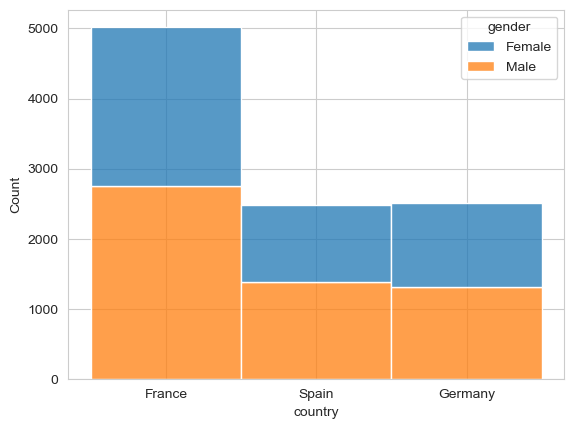

In [12]:
sns.histplot(data=data, x="country", hue="gender", multiple="stack")

In [13]:
pd.value_counts(data['gender'])

Male      5457
Female    4543
Name: gender, dtype: int64

In [14]:
100 * data['gender'].value_counts() / len(data['gender'])

Male      54.57
Female    45.43
Name: gender, dtype: float64

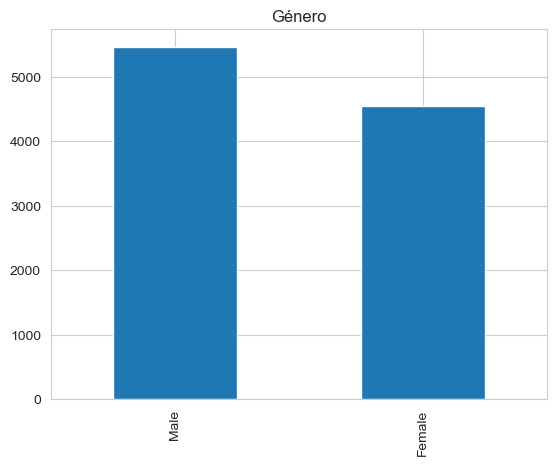

In [15]:
plot = data['gender'].value_counts().plot(kind='bar',
                                            title='Género')

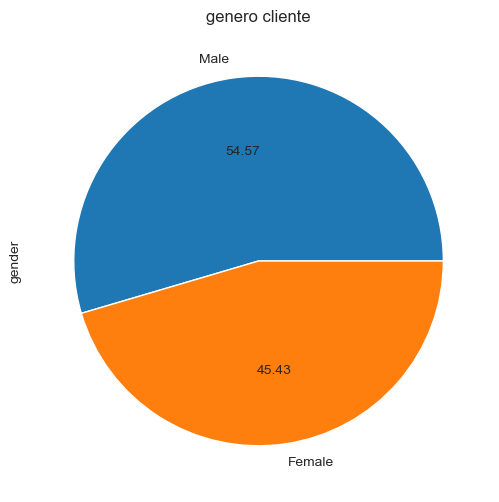

In [16]:
plot = data['gender'].value_counts().plot(kind='pie', autopct='%.2f',
                                            figsize=(6, 6),
                                            title='genero cliente')

Se realizan análisis gráficos de las variables país y género.
En este caso, queremos entender cuáles son las características de categorías que existen de estas variables.
Dado que tenemos una muestra poblacional de 10.000 personas, sabemos que la distribución de genero es casi de un 55% promedio, donde hay 5457 hombres y 4543 mujeres. Por otro lado, el 50,14% de la muestra tiene como país Francia, los otros países tienen una distribución similar del 25% cada una.

In [17]:
pd.value_counts(data['churn'])

0    7963
1    2037
Name: churn, dtype: int64

In [18]:
100 * data['churn'].value_counts() / len(data['churn'])

0    79.63
1    20.37
Name: churn, dtype: float64

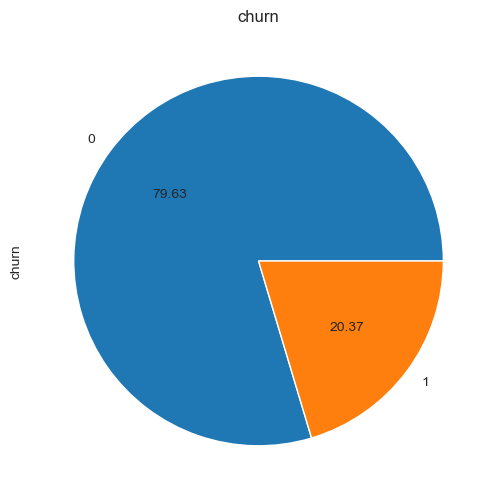

In [19]:
plot = data['churn'].value_counts().plot(kind='pie', autopct='%.2f',
                                            figsize=(6, 6),
                                            title='churn')

In [20]:
pd.value_counts(data['active_member'])

1    5151
0    4849
Name: active_member, dtype: int64

In [28]:
100 * data['active_member'].value_counts() / len(data['active_member'])

1    51.51
0    48.49
Name: active_member, dtype: float64

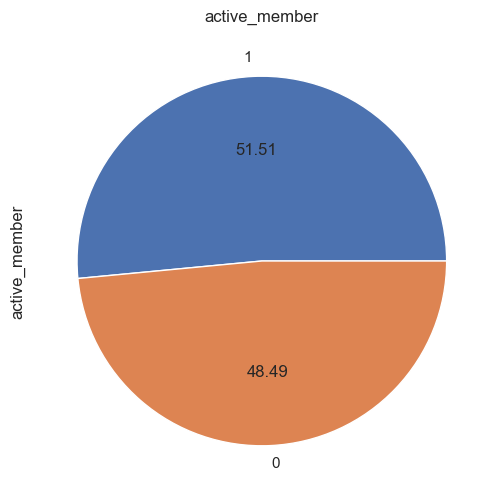

In [27]:
plot = data['active_member'].value_counts().plot(kind='pie', autopct='%.2f',
                                            figsize=(6, 6),
                                            title='active_member')

Con el anterior análisis gráfico, se hace una validación de como están distribuidas las variables Churn & Active member. En donde particularmente podemos indicar que la cantidad de clientes que han salido del banco dentro de la muestra corresponde a un 20.37%, de acuerdo con el tipo de dato, sabemos que este una variable dicotómica en la que el valor '1' nos indica que el cliente abandonó la entidad. Por otro lado, la variable Active_member, nos indica si el cliente se encuentra activo dentro de la base de la entidad, lo que nos muestra que el 48.49% NO se encuentra activo de la base.

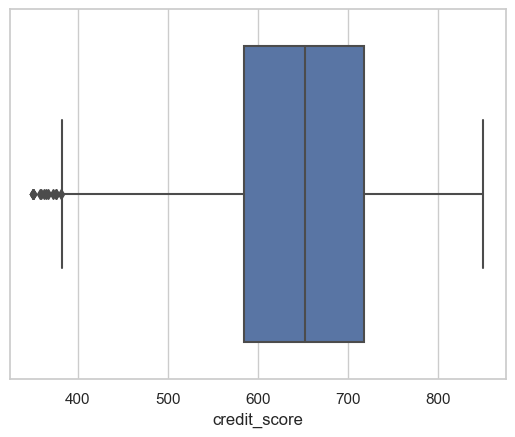

In [26]:
sns.set_theme(style="whitegrid")
# Axis-level
ax = sns.boxplot(x=data["credit_score"])

<Axes: xlabel='credit_score', ylabel='Density'>

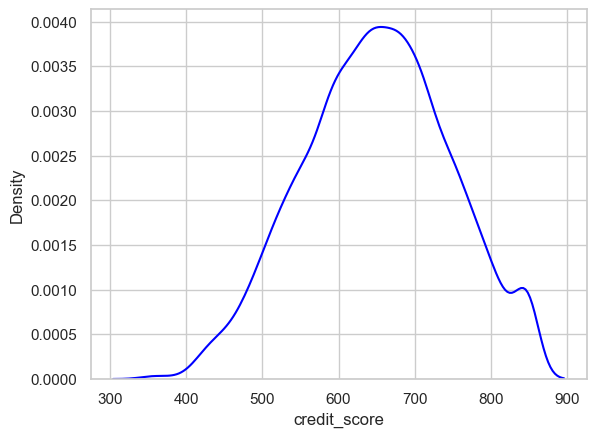

In [24]:
sns.kdeplot(data["credit_score"],color='blue')

Text(0, 0.5, 'Edad')

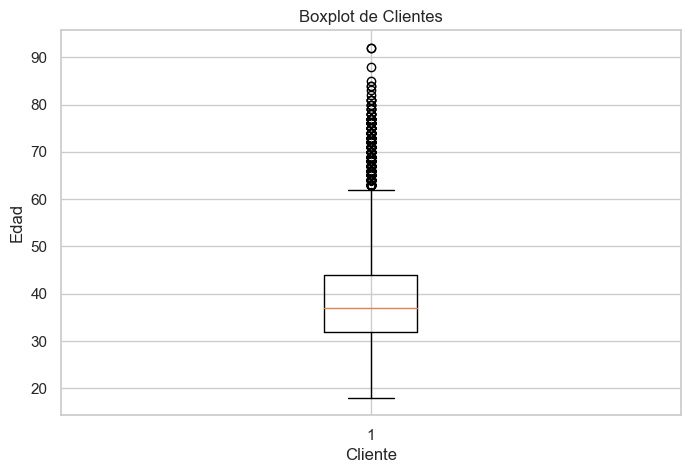

In [25]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.boxplot(x=data.age,)
ax.set_title('Boxplot de Clientes')
ax.set_xlabel('Cliente')
ax.set_ylabel('Edad')

<Axes: xlabel='age', ylabel='Density'>

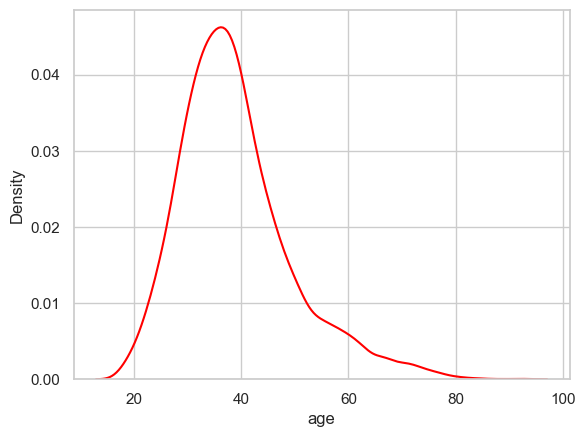

In [ ]:
sns.kdeplot(data["age"],color='red')

Realizamos el análisis descriptivo de las demás variables para entender un poco de las Medidas de Tendencia Central (MTC) y así entender de manera detallada las distribución de las variables.

### Análisis Bi-variado & Multivariado

In [ ]:
num_var = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

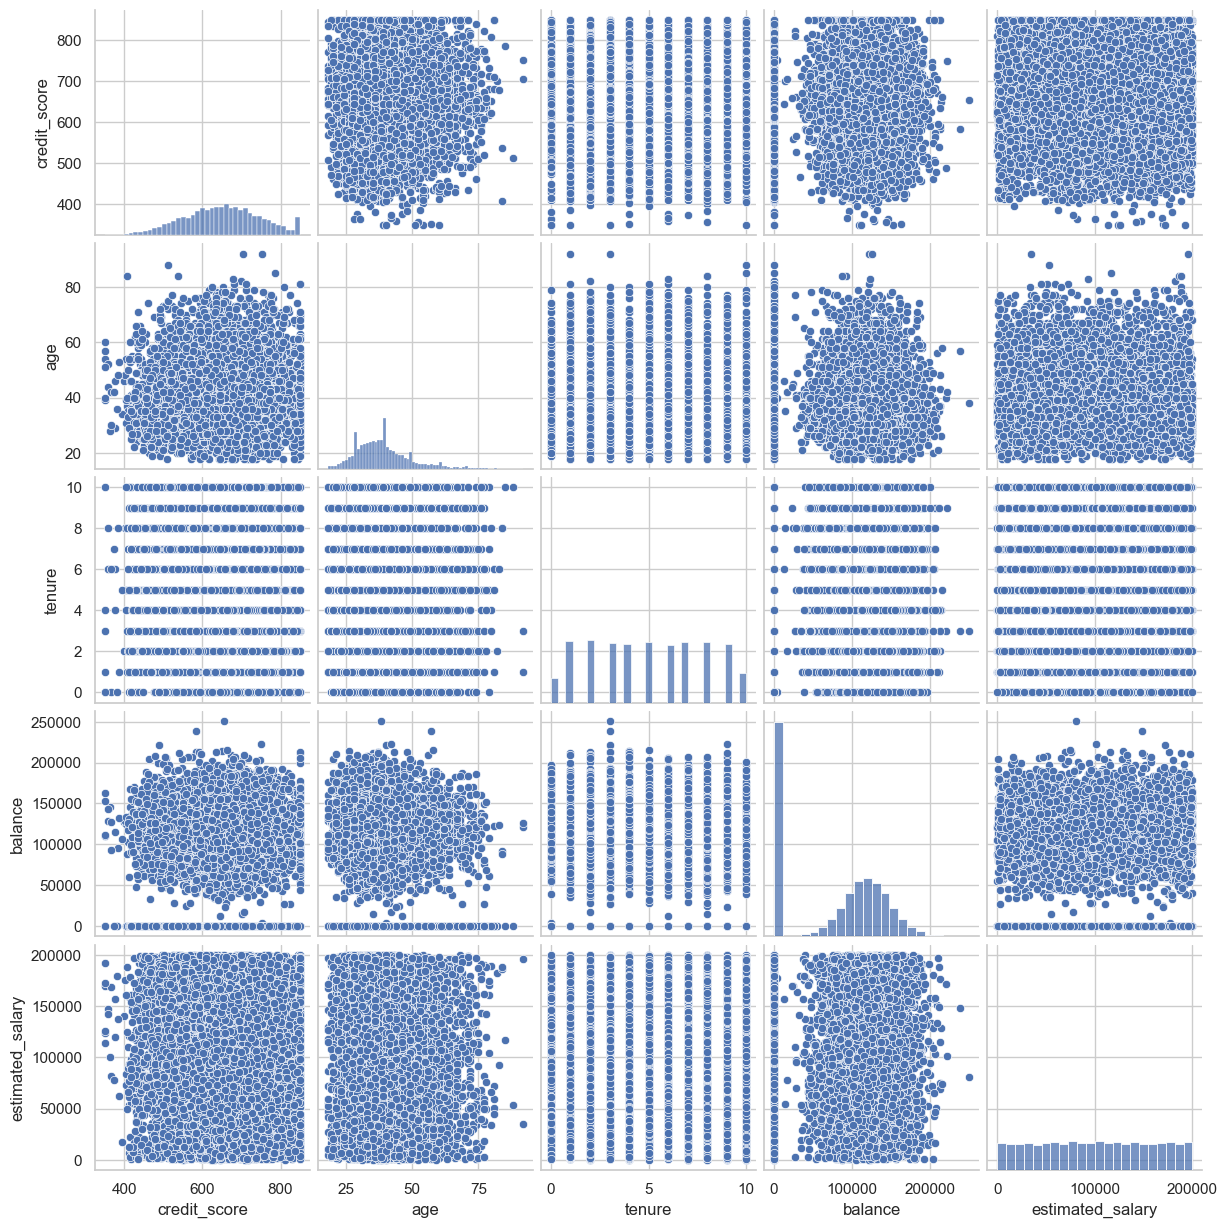

In [ ]:
sns.pairplot(data[num_var], kind='scatter', diag_kind='hist')
plt.show()

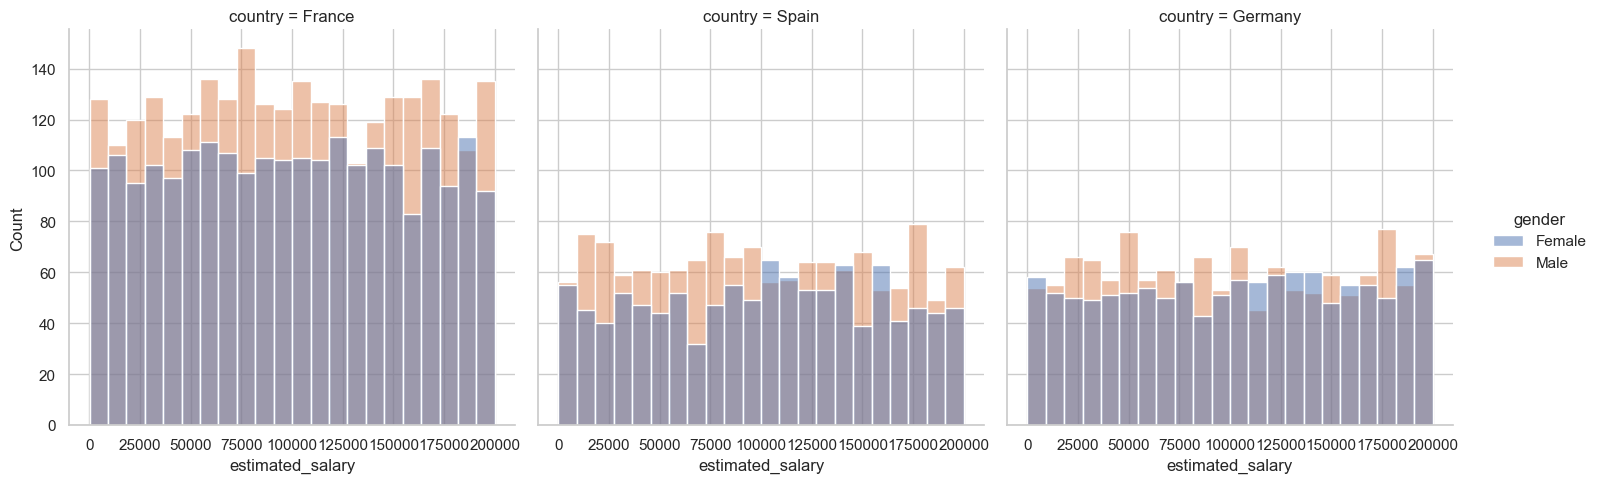

In [ ]:
sns.displot(data=data, x="estimated_salary", hue="gender",col="country")

Podemos determinar que la variable estimated_salary tiene un mayor valor en promedio para los el tipo de genero Male en la región Francia.

<Axes: xlabel='estimated_salary', ylabel='age'>

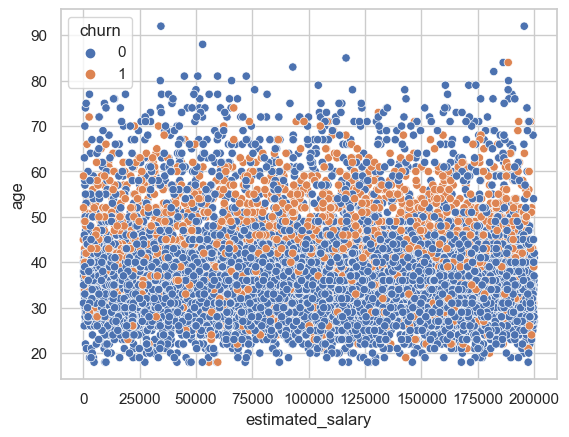

In [ ]:
sns.scatterplot(data=data, x="estimated_salary", y="age", hue="churn")

<Axes: xlabel='age', ylabel='credit_score'>

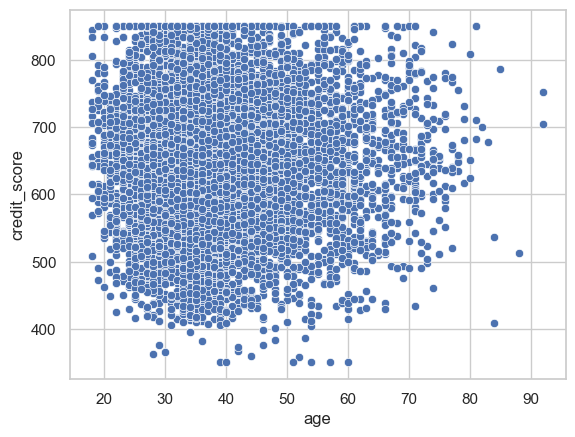

In [ ]:
sns.scatterplot(data=data, x="age", y="credit_score")

<Axes: xlabel='gender', ylabel='estimated_salary'>

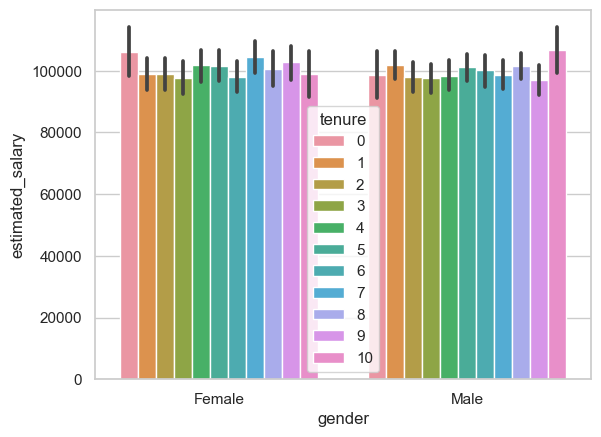

In [ ]:
 sns.barplot(x="gender", y="estimated_salary", hue="tenure", data=data)

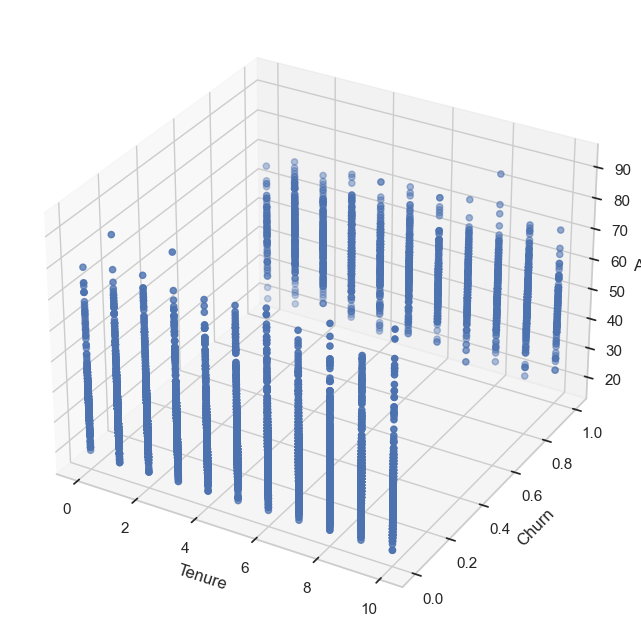

In [ ]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111, projection = '3d')

x = data.tenure
y = data.churn
z = data.age

ax.set_xlabel("Tenure")
ax.set_ylabel("Churn")
ax.set_zlabel("Age")

ax.scatter(x, y, z)

plt.show()

C:\Users\mateo\AppData\Local\Temp\ipykernel_8168\3888159855.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


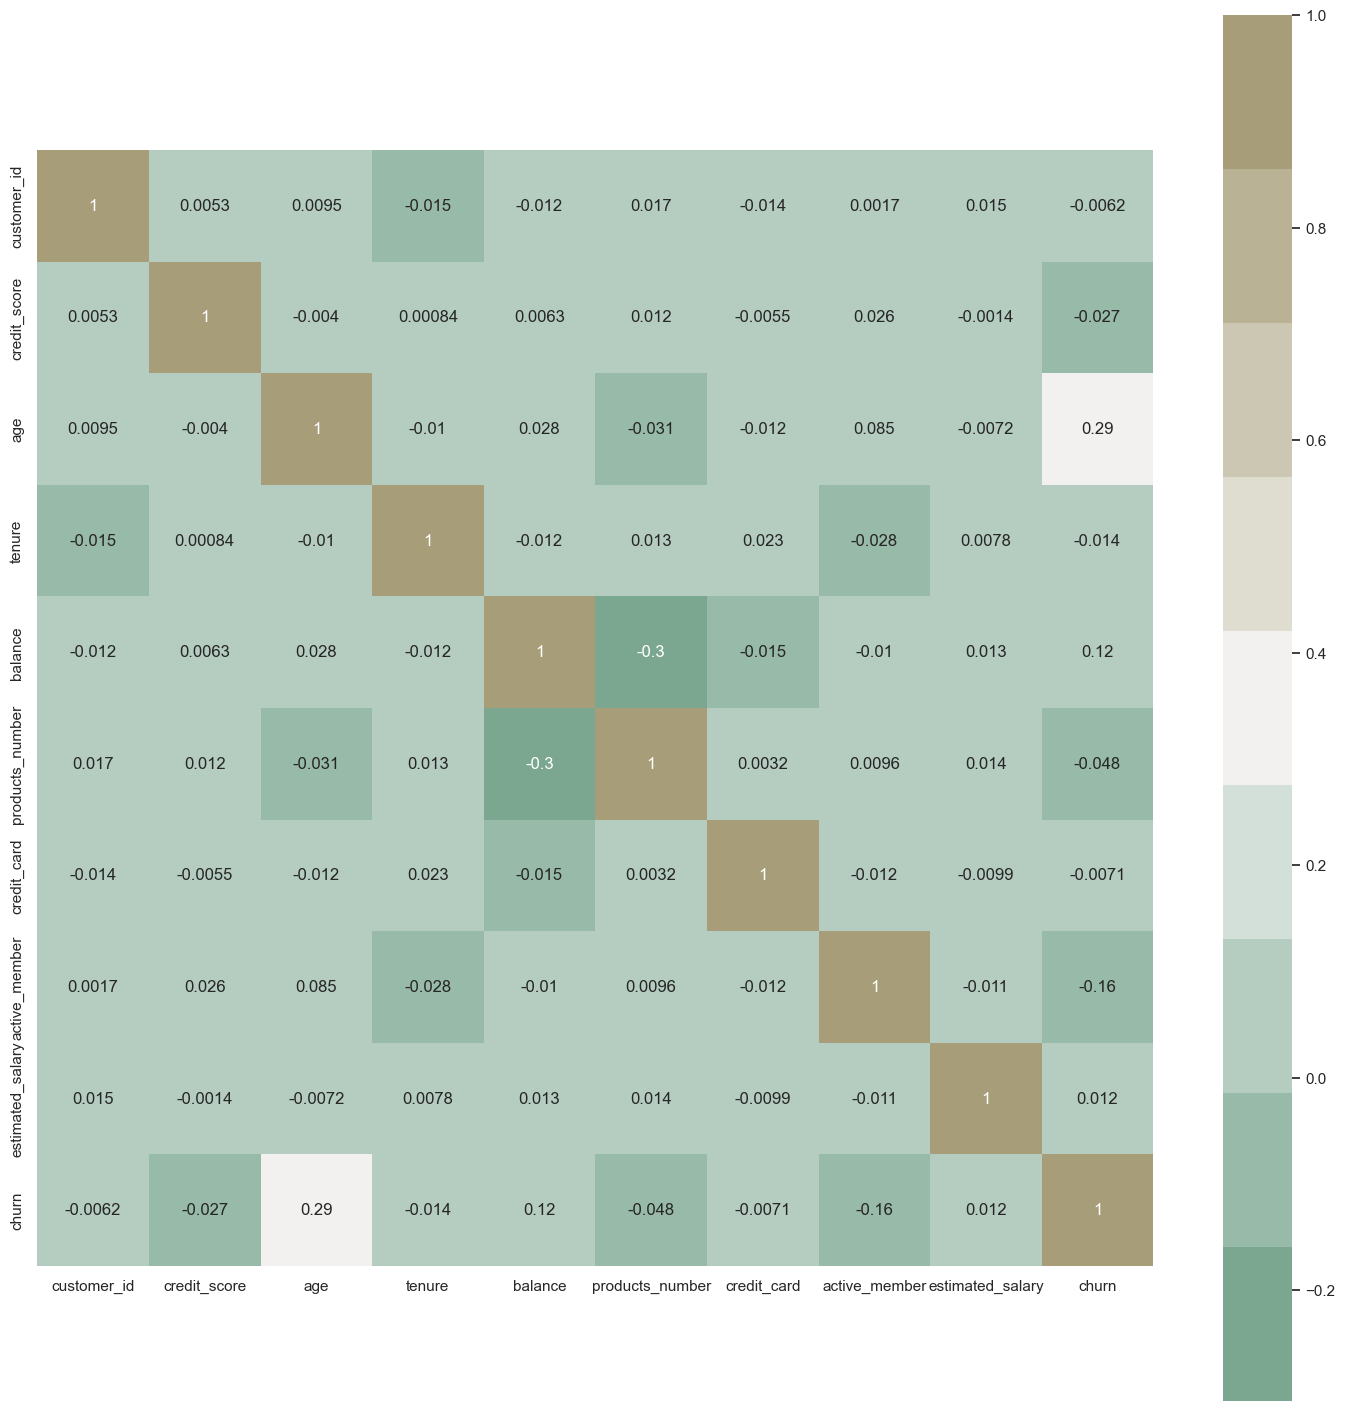

In [ ]:
cmap=sns.diverging_palette(150,75,  s=40, l=65, n=9)
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap=cmap,annot=True, square=True);

##  Conclusiones preliminares

De acuerdo el análisis de correlación podemos percibir que no hay variables con un alto coeficiente de relación entre ellas,
que nos puedan dar indicios de patrones sobre los resultados.
Podríamos decir que existe una relación entre las variables "age" y "churn" que podría ser útil dentro de la hipotesis.

Se puede determinar que el dataset no tiene datos Null o NaN lo cual nos ayuda a tener una información completa y veráz. Por otro lado, no existe un alto nivel de relación entre la variable objetivo ('churn') y las variables independientes, por lo que se deberá entrenar el modelo de acuerdo con las variables categóricas y númericas existentes con el propósito de encontrar la mejor manera de categorizar los datos de entrenamiento y aplicarlo sobre los de testeo. La mejor opción para realizar el feature selection será a través de un stepwise_selection y se propone utilizar un algoritmo de clasificación de modelo de K-means, random forest o de Artificial Neuronal Network para cumplir con el objetivo de validar la predicción de la salida de clientes del banco.

# Data Wrangling

In [29]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [30]:
data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [31]:
print(data.shape)
train= data.drop_duplicates()
print(train.shape)

(10000, 12)
(10000, 12)


In [ ]:
pd.set_option('display.max_rows', None)  # or 1000
serie=(data.isnull().sum()/data.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

Series([], dtype: float64)

In [32]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<Axes: >

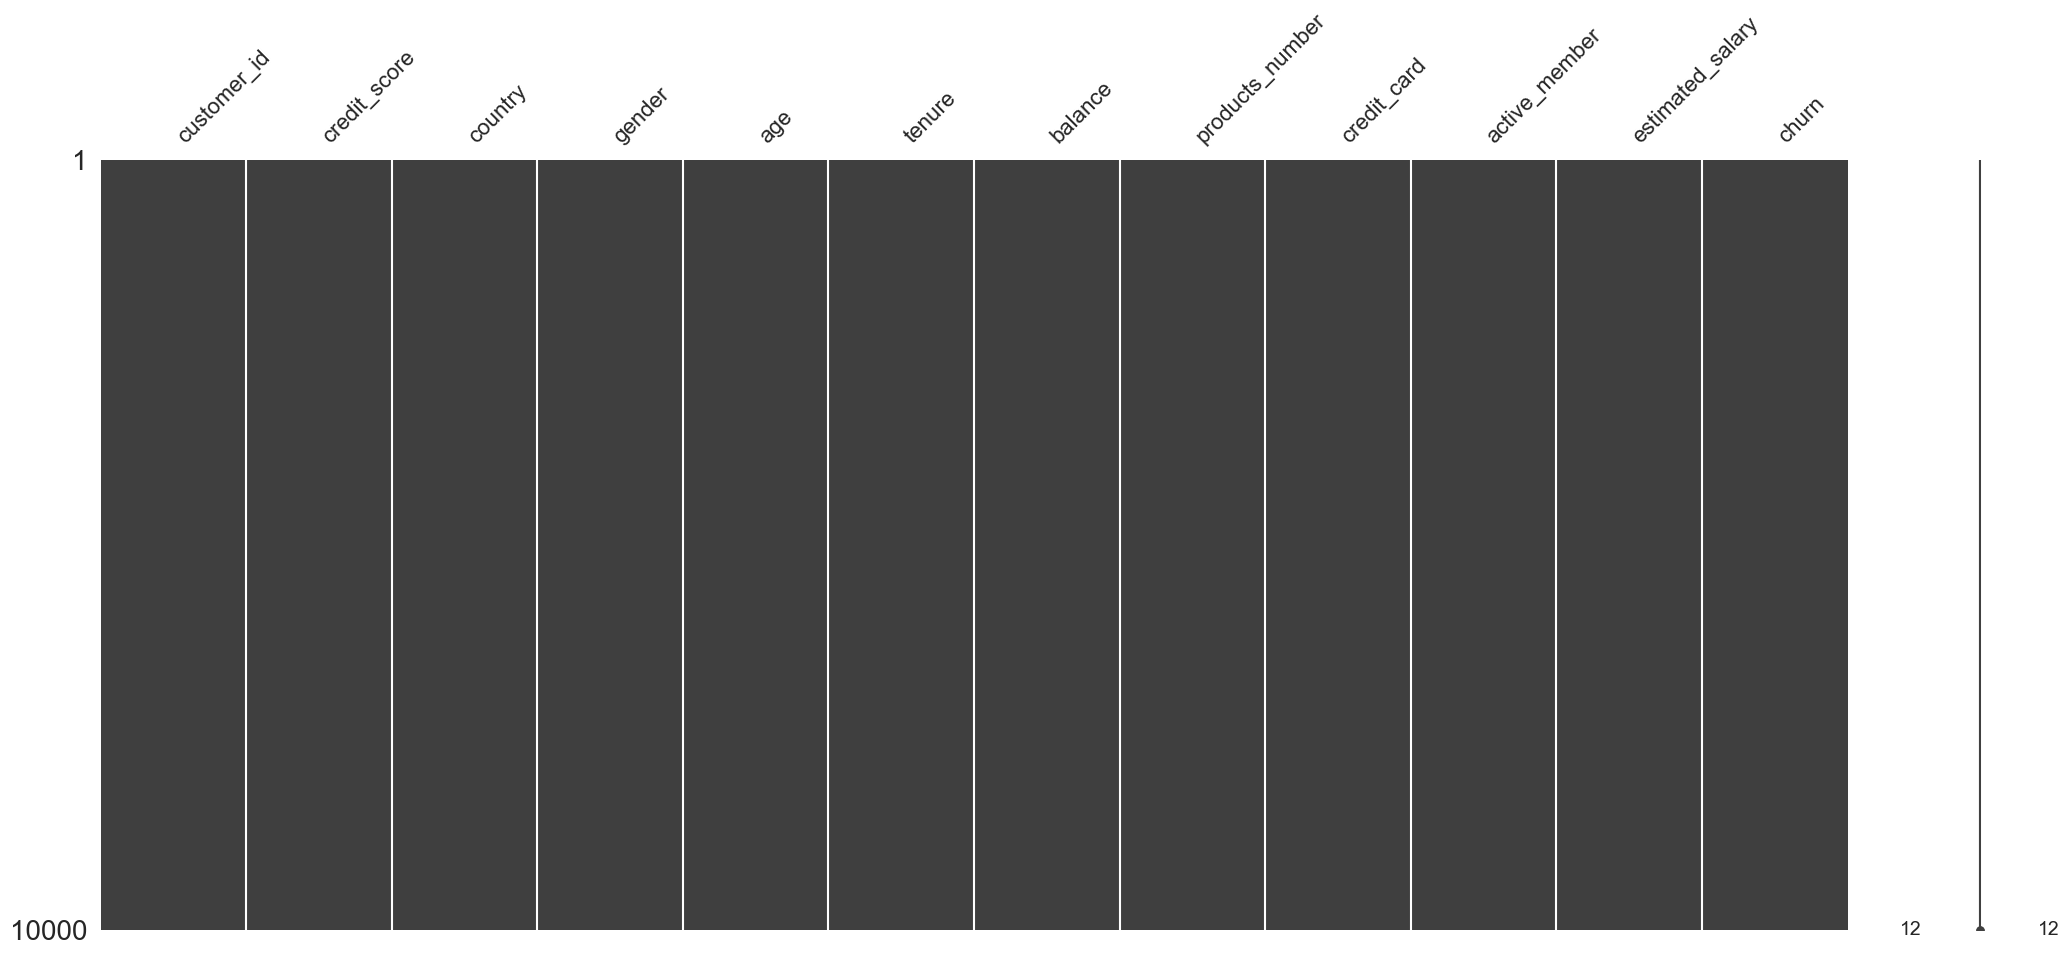

In [ ]:
msno.matrix(train)

C:\Users\mateo\anaconda3\lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\mateo\anaconda3\lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

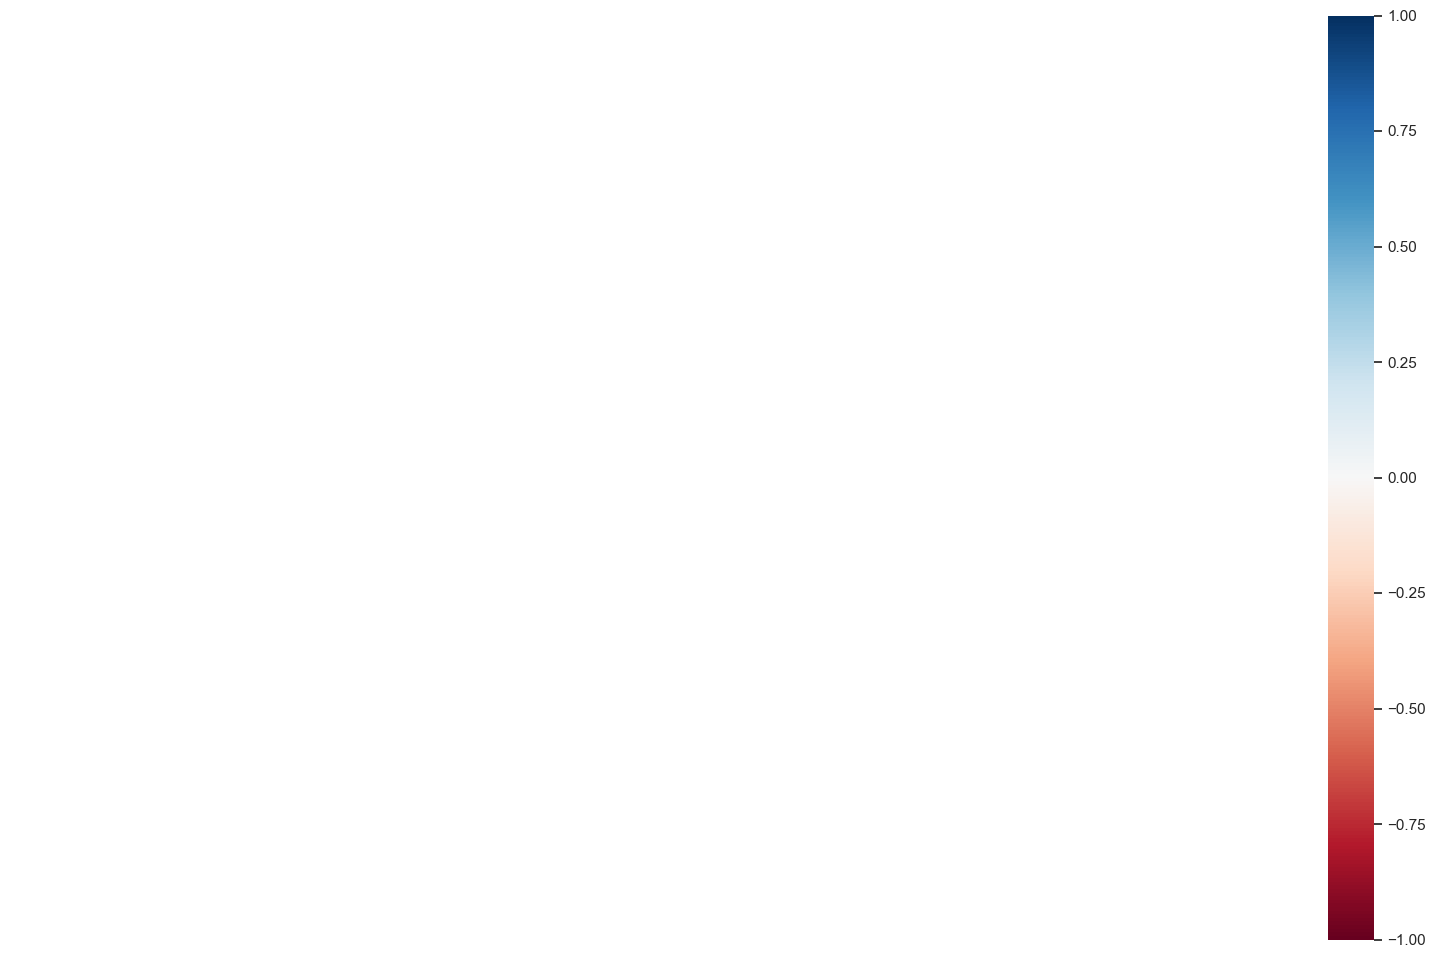

In [33]:
msno.heatmap(train)

C:\Users\mateo\anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:2848: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


<Axes: >

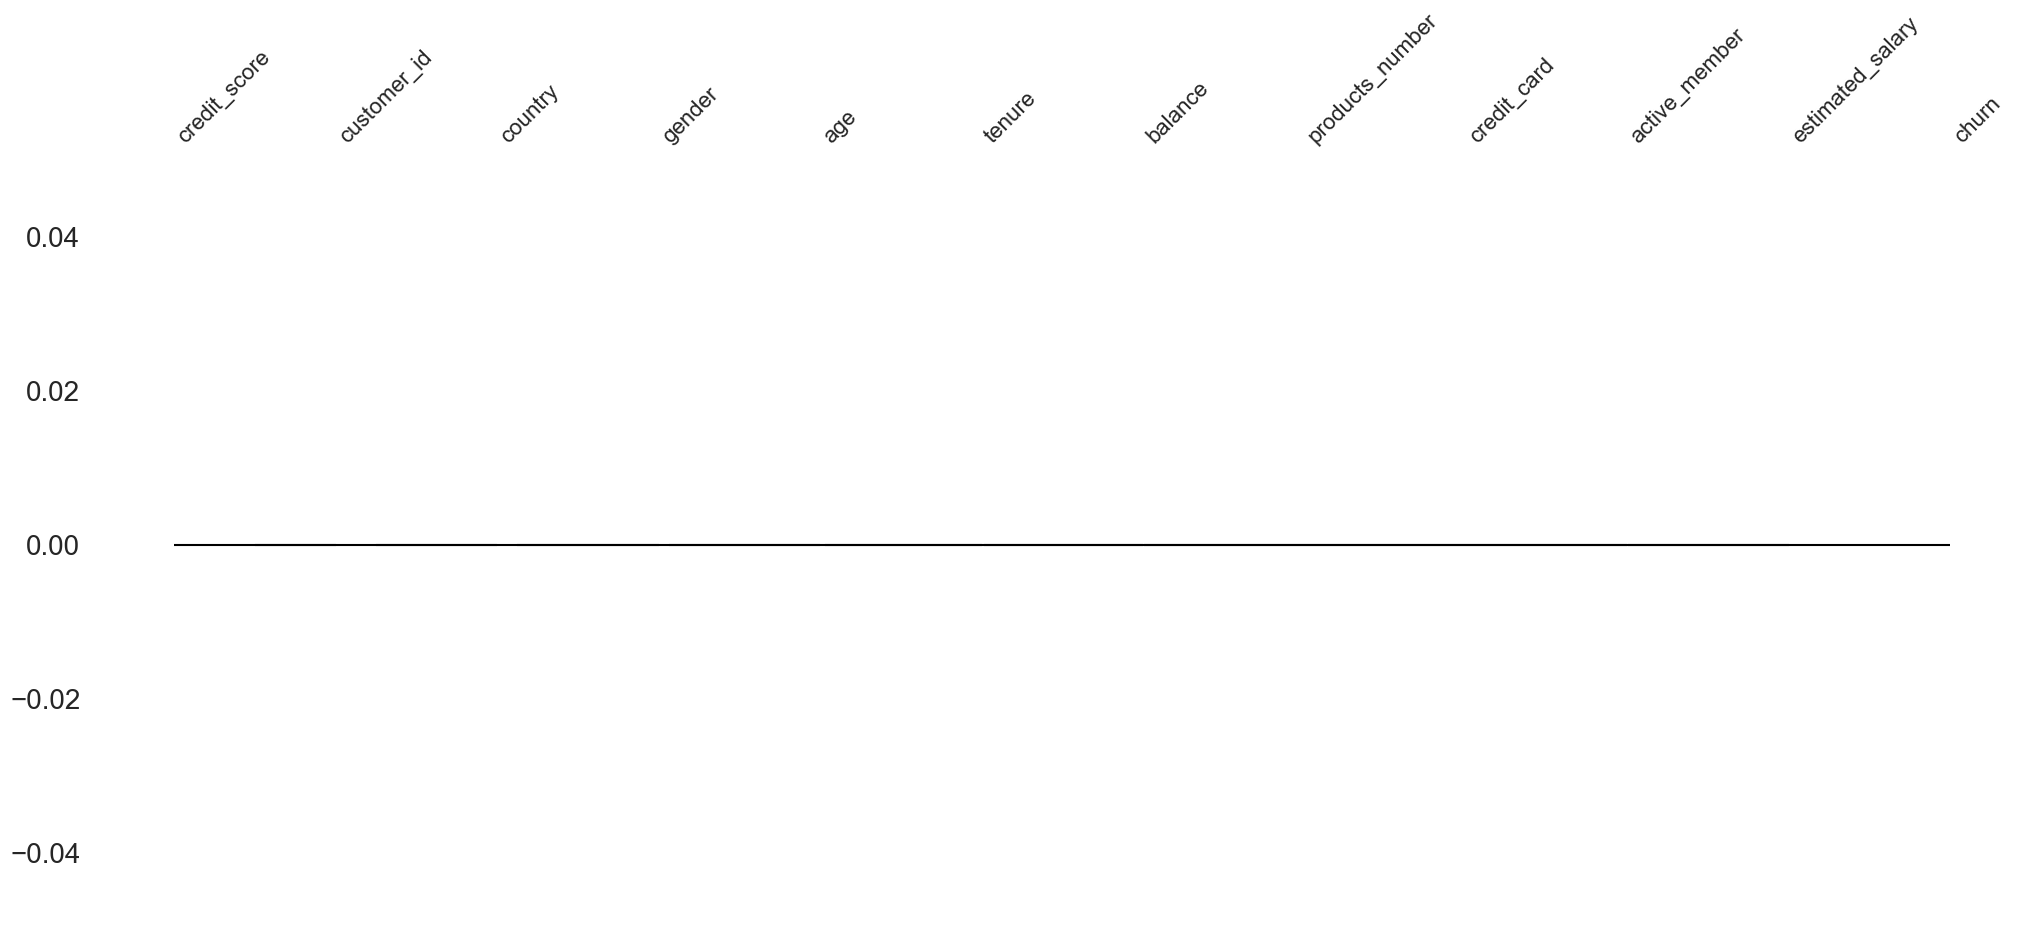

In [ ]:
msno.dendrogram(train)

De acuerdo con los análisis de Data Wrangling realizados, se puede observar que en terminos de datos NULL, NA o campos faltantes, el dataset se encuentra sin muchas incidencias. Se considera la posibilidad de eliminar columnas que no tengan un alto nivel de correlación de acuerdo con la matriz, esto con el propósito de aprovechar las variables que tengan relación con las variables categóricas.

Lo siguiente que realizarémos será clasificar nuestras variables Categóricas y Numéricas. 
# Variables Categóricas

In [50]:
categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 2 categorical variables

The categorical variables are : ['country', 'gender']


In [51]:
data[categorical].head()

,country,gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


In [52]:
#Frecuencia de las variables categóricas
for var in categorical: 
    
    print(data[var].value_counts())

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64
Male      5457
Female    4543
Name: gender, dtype: int64


# Variables Numéricas

In [53]:
numerical = [var for var in data.columns if data[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 10 numerical variables

The numerical variables are : ['customer_id', 'credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']


In [54]:
print(round(data[numerical].describe()),2)

       customer_id  credit_score      age   tenure   balance  products_number  \
count      10000.0       10000.0  10000.0  10000.0   10000.0          10000.0   
mean    15690941.0         651.0     39.0      5.0   76486.0              2.0   
std        71936.0          97.0     10.0      3.0   62397.0              1.0   
min     15565701.0         350.0     18.0      0.0       0.0              1.0   
25%     15628528.0         584.0     32.0      3.0       0.0              1.0   
50%     15690738.0         652.0     37.0      5.0   97199.0              1.0   
75%     15753234.0         718.0     44.0      7.0  127644.0              2.0   
max     15815690.0         850.0     92.0     10.0  250898.0              4.0   

       credit_card  active_member  estimated_salary    churn  
count      10000.0        10000.0           10000.0  10000.0  
mean           1.0            1.0          100090.0      0.0  
std            0.0            0.0           57510.0      0.0  
min            0.0

# Conclusiones preliminares
De acuerdo con los análisis realizados, se puede determinar que el dataset no tiene datos Null o NaN lo cual nos ayuda a tener una información completa y veráz. Por otro lado, no existe un alto nivel de relación entre la variable objetivo y las variables independientes, por lo que se deberá entrenar el modelo de acuerdo con las variables categóricas y númericas existentes con el propósito de encontrar la mejor manera de categorizar los datos de entrenamiento y aplicarlo sobre los de testeo. La mejor opción para realizar el feature selection será a través de un stepwise_selection y se propone utilizar un algoritmo de clasificación de modelo de K-means, random forest o de Artificial Neuronal Network para cumplir con el objetivo de validar la predicción de la salida de clientes del banco.

# Feature Selection

Vamos a realizar la selección de características para el algoritmo de aprendizaje automático para nuestro conjunto de datos. 

A través del método de Variance Inflation Factor, Chi2 y Variance Threshold, buscamos realizar la segmentación de los datos para así eliminar las características con bajo nivel de significancia de nuestro modelo. 

In [34]:
mldf = data
mldf

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [36]:
## Remplazamos el tipo de dato genero dado que el modelo entiende y utiliza valores numéricos.
mldf["gender"].replace({"Female":0,"Male":1},inplace = True)
mldf

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [37]:
## Creamos las variables dummies para la variable categórica país
mldf[["country__France","country__Germany","country__Spain"]]  = pd.get_dummies(mldf["country"],prefix = "Country_" )
mldf

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country__France,country__Germany,country__Spain
0,15634602,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,15647311,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,15619304,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,15701354,699,France,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,15737888,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,15569892,516,France,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,15584532,709,France,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,15682355,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [38]:
#Eliminamos la variable customer_id, esto dado los prinicipios de seguridad de la información y teniendo en cuenta que no tiene un nivel de significancia alto para nuestro modelo, 
mldf.drop(["customer_id"],axis = 1, inplace = True)

In [39]:
# Eliminamos la variable country, teniendo en cuenta que solo utilizaremos los dummies de dicho dato.
mldf.drop("country",axis = 1,inplace = True)

In [40]:
mldf

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country__France,country__Germany,country__Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


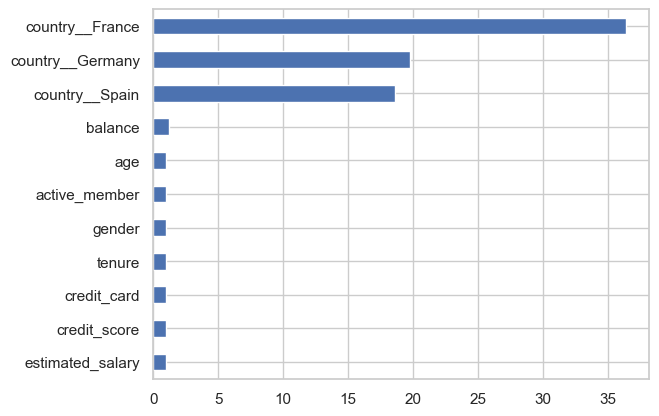

In [45]:
# variance inflation factor method for feature selection
_ = mldf[['credit_score', 'gender', 'age', 'tenure', 'balance', 'credit_card',"active_member",
       'estimated_salary', 'country__France', 'country__Germany',"country__Spain"]]
vif_lst = []

for i in range(_.shape[1]):
    vif = variance_inflation_factor(_.to_numpy(),i)
    vif_lst.append(vif)
    
s = pd.Series(vif_lst,_.columns)
s.sort_values().plot(kind = "barh")
plt.show()

In [55]:
#Método chi2 
_temp = mldf[['gender', 'tenure', 'credit_card', 'active_member', 'country__France',
        'country__Germany', 'country__Spain']]
chi, p_val = chi2(_temp,mldf["churn"])
s = pd.DataFrame({"Chi2":np.around(chi,2), "P_val": np.around(p_val,2)}, index = _temp.columns)
s

,Chi2,P_val
gender,51.54,0.00
tenure,3.27,0.07
credit_card,0.15,0.70
active_member,118.20,0.00
country__France,54.92,0.00
country__Germany,225.46,0.00
country__Spain,20.87,0.00


In [56]:
# variance threshold method
var_th = VarianceThreshold(threshold = 0.0)
var_th.fit_transform(_)
s = pd.Series(var_th.get_support(),index = _.columns)
s

credit_score        True
gender              True
age                 True
tenure              True
balance             True
credit_card         True
active_member       True
estimated_salary    True
country__France     True
country__Germany    True
country__Spain      True
dtype: bool

In [57]:
# variance threshold method
_temp = mldf[['age', 'balance', 'credit_score', 'estimated_salary']]
f_val,p_val = f_classif(_temp,mldf["churn"])
pd.DataFrame({"F_Val": np.around(f_val,2), "P_val": np.around(p_val,2)},index = _temp.columns)

,F_Val,P_val
age,886.06,0.00
balance,142.47,0.00
credit_score,7.34,0.01
estimated_salary,1.46,0.23


De acuerdo con el resultado del feature selection, podemos continuar con las variables definidas: credit_score True gender True age True tenure True balance True credit_card True active_member True estimated_salary True country__France True country__Germany True country__Spain True


# Algoritmo de Clasificación

Utilizaremos los algoritmos de Logistic Regression - Decision Tree Classifier - Random Forest Classifier - XGBClassifier - K Neighbors Classifier - Ada Boost Classifier, para realizar la predicción de la clasificación de los datos. 

# Logistic Regression - Decision Tree Classifier - Random Forest Classifier - XGBClassifier - K Neighbors Classifier - Ada Boost Classifier

In [58]:
##Eliminamos la variable objetivo
x = mldf.drop("churn",axis = 1)
y = mldf["churn"]

In [59]:
sm = SMOTE(sampling_strategy=0.75)
x1,y1 = sm.fit_resample(x,y)

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1, test_size = 0.2 ,random_state = 45,stratify = y1)

In [61]:
scl = StandardScaler()
arr = scl.fit_transform(x_train)
x1_train  = pd.DataFrame(arr, columns = x_train.columns)

In [62]:
x1_test = scl.transform(x_test)

In [63]:
# Definimos los modelos de Clasificación
def get_accuracy(model_name):
    model         = model_name
    model.fit(x1_train,y_train)
    y_pred_train  = model.predict(x1_train)
    ac_score_tr   = accuracy_score(y_train,y_pred_train)
    conf_mT_tr    = confusion_matrix(y_train,y_pred_train)
    cls_report_tr = classification_report(y_train,y_pred_train)
    
    y_pred_test   = model.predict(x1_test)
    ac_score_te   = accuracy_score(y_test,y_pred_test)
    conf_mT_te    = confusion_matrix(y_test,y_pred_test)
    cls_report_te = classification_report(y_test,y_pred_test)
    
    return print(f"ac_score_tr\n {ac_score_tr} conf_mT_tr\n {conf_mT_tr} cls_report_tr\n {cls_report_tr} ac_score_te\n {ac_score_te} conf_mT_te\n {conf_mT_te} cls_report_te\n {cls_report_te}")

In [64]:
for model_name,model in [("LogisticRegression",LogisticRegression()),("DecisionTreeClassifier",DecisionTreeClassifier()),("RandomForestClassifier",RandomForestClassifier()),("XGBClassifier",XGBClassifier()),
                         ("KNeighborsClassifier",KNeighborsClassifier()),("svc",SVC()),("AdaBoostClassifier",AdaBoostClassifier())]:
    print(model_name)
    print(get_accuracy(model))
    print("*"*100)

LogisticRegression


C:\Users\mateo\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ac_score_tr
 0.8138679583781844 conf_mT_tr
 [[5659  711]
 [1364 3414]] cls_report_tr
               precision    recall  f1-score   support

           0       0.81      0.89      0.85      6370
           1       0.83      0.71      0.77      4778

    accuracy                           0.81     11148
   macro avg       0.82      0.80      0.81     11148
weighted avg       0.82      0.81      0.81     11148
 ac_score_te
 0.8066020810907786 conf_mT_te
 [[1392  201]
 [ 338  856]] cls_report_te
               precision    recall  f1-score   support

           0       0.80      0.87      0.84      1593
           1       0.81      0.72      0.76      1194

    accuracy                           0.81      2787
   macro avg       0.81      0.80      0.80      2787
weighted avg       0.81      0.81      0.80      2787

None
****************************************************************************************************
DecisionTreeClassifier


C:\Users\mateo\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ac_score_tr
 1.0 conf_mT_tr
 [[6370    0]
 [   0 4778]] cls_report_tr
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      4778

    accuracy                           1.00     11148
   macro avg       1.00      1.00      1.00     11148
weighted avg       1.00      1.00      1.00     11148
 ac_score_te
 0.7990670972371726 conf_mT_te
 [[1285  308]
 [ 252  942]] cls_report_te
               precision    recall  f1-score   support

           0       0.84      0.81      0.82      1593
           1       0.75      0.79      0.77      1194

    accuracy                           0.80      2787
   macro avg       0.79      0.80      0.80      2787
weighted avg       0.80      0.80      0.80      2787

None
****************************************************************************************************
RandomForestClassifier


C:\Users\mateo\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ac_score_tr
 1.0 conf_mT_tr
 [[6370    0]
 [   0 4778]] cls_report_tr
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      4778

    accuracy                           1.00     11148
   macro avg       1.00      1.00      1.00     11148
weighted avg       1.00      1.00      1.00     11148
 ac_score_te
 0.8772874058127018 conf_mT_te
 [[1441  152]
 [ 190 1004]] cls_report_te
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      1593
           1       0.87      0.84      0.85      1194

    accuracy                           0.88      2787
   macro avg       0.88      0.87      0.87      2787
weighted avg       0.88      0.88      0.88      2787

None
****************************************************************************************************
XGBClassifier
ac_score_tr
 0.9538930749910298 conf_mT_tr
 [[6207  163]
 [ 351 4427]

C:\Users\mateo\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ac_score_tr
 0.8819519196268389 conf_mT_tr
 [[5828  542]
 [ 774 4004]] cls_report_tr
               precision    recall  f1-score   support

           0       0.88      0.91      0.90      6370
           1       0.88      0.84      0.86      4778

    accuracy                           0.88     11148
   macro avg       0.88      0.88      0.88     11148
weighted avg       0.88      0.88      0.88     11148
 ac_score_te
 0.8414065303193398 conf_mT_te
 [[1383  210]
 [ 232  962]] cls_report_te
               precision    recall  f1-score   support

           0       0.86      0.87      0.86      1593
           1       0.82      0.81      0.81      1194

    accuracy                           0.84      2787
   macro avg       0.84      0.84      0.84      2787
weighted avg       0.84      0.84      0.84      2787

None
****************************************************************************************************
svc


C:\Users\mateo\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ac_score_tr
 0.869573017581629 conf_mT_tr
 [[5935  435]
 [1019 3759]] cls_report_tr
               precision    recall  f1-score   support

           0       0.85      0.93      0.89      6370
           1       0.90      0.79      0.84      4778

    accuracy                           0.87     11148
   macro avg       0.87      0.86      0.86     11148
weighted avg       0.87      0.87      0.87     11148
 ac_score_te
 0.8571941155364191 conf_mT_te
 [[1455  138]
 [ 260  934]] cls_report_te
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1593
           1       0.87      0.78      0.82      1194

    accuracy                           0.86      2787
   macro avg       0.86      0.85      0.85      2787
weighted avg       0.86      0.86      0.86      2787

None
****************************************************************************************************
AdaBoostClassifier
ac_score_tr
 0.8502870470039469 conf_mT_tr
 [[5662

C:\Users\mateo\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [66]:
svm = SVC()
svm.fit(x1_train,y_train)

SVC()

# Validación Overfitting and Underfitting 
# SVM Support Vector Machine 

Nos da la exactitud sobre los datos sobre la validación de overfitting y underfitting. Por lo que podemos continuar con el modelo sin necesidad que se encuentra sesgado. 

SVM

ac_score_tr
 0.8712773591675637 conf_mT_tr
 [[5911  459]
 [ 976 3802]] cls_report_tr
               precision    recall  f1-score   support

           0       0.86      0.93      0.89      6370
           1       0.89      0.80      0.84      4778

    accuracy                           0.87     11148
   macro avg       0.88      0.86      0.87     11148
weighted avg       0.87      0.87      0.87     11148
 ac_score_te
 0.85827054180122 conf_mT_te
 [[1458  135]
 [ 260  934]] cls_report_te
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      1593
           1       0.87      0.78      0.83      1194

    accuracy                           0.86      2787
   macro avg       0.86      0.85      0.85      2787
weighted avg       0.86      0.86      0.86      2787